<a href="https://colab.research.google.com/github/vivek9935/Machine_Learning/blob/main/Customer_Segmentation_using_K_mean_Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as KMeasn

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Genre'] = df['Genre'].rename({'Male': 1,'Female':0})

In [9]:
#Chossing the annual Income column and Spending score
x = df.iloc[:,[3,4]].values

WCSS => Within Cluster Sum of Square


```
WCSS measures the sum of the squared distances between each point and the centroid of the cluster it belongs to.

In simpler terms:
It tells us how tightly grouped the data points are within each cluster. Lower WCSS means better (more compact) clusters.






In [16]:
# finding wss values for different number of cluster
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

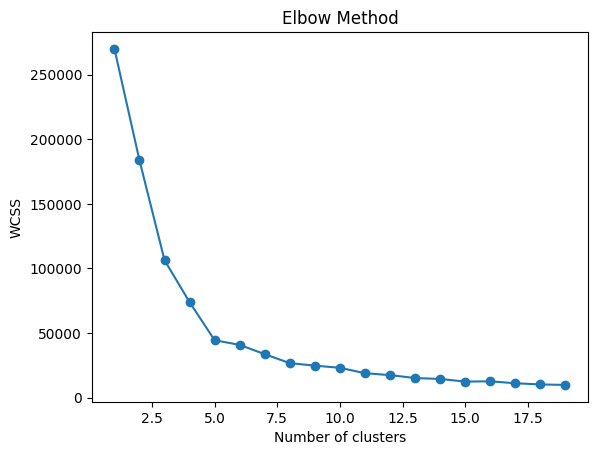

In [17]:
#plot an elbo graph
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Optimum Number cluste is 10
#Traing the K-mean Custering Modeal
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
#return a label for each data point based on their cluster
y = kmeans.fit_predict(x)
print(y)

[6 3 4 3 6 3 4 3 4 3 4 3 4 3 4 3 6 8 6 3 6 8 4 8 4 3 6 8 6 3 4 8 4 3 4 3 4
 8 6 8 6 3 6 8 6 8 8 6 6 6 0 8 0 8 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 0 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 1 2 5 2 5 2 1 2 1 2 5 2 1 7 1 7 1 7
 1 7 1 7 1 7 1 7 1 7 9 7 9 7 9]


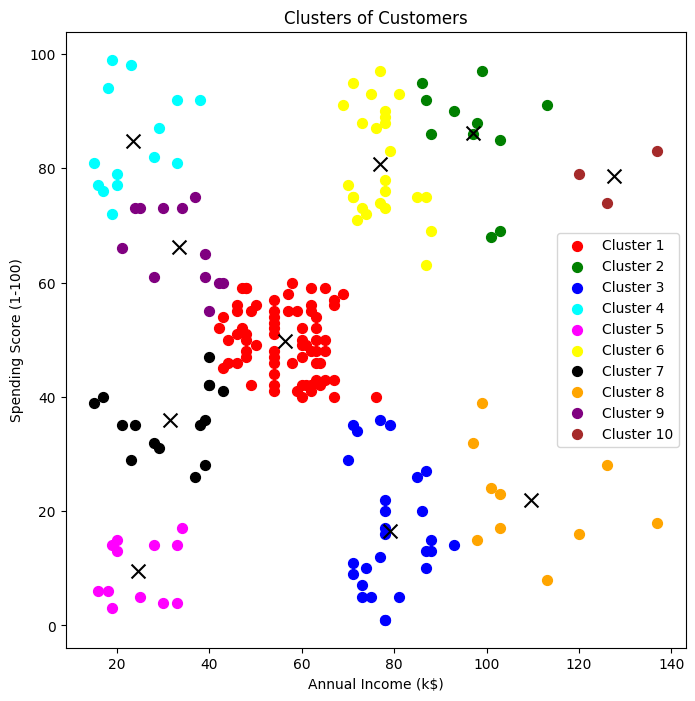

In [23]:
#Visualizing all the Cluster
plt.figure(figsize=(8,8))
# Define a list of colors for the clusters
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
# or you can use a colormap:
# colors = plt.cm.get_cmap('tab10', 10).colors

for i in range(10):
    plt.scatter(x[y==i,0], x[y==i,1], s=50, c=colors[i], label='Cluster '+str(i+1))
#plot the centroid

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', marker='x')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()